<a href="https://www.kaggle.com/code/nursenaglhan/fruits-and-vegetables-prices-prediction?scriptVersionId=205147190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
df=pd.read_csv("//kaggle//input//fruits-and-vegetables-prices-in-usa//Prices.csv")
df.head(3)


,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.1804,per pound,0.4586,0.4519,pounds,1.1633
1,Apples,Fresh,1.5193,per pound,0.9000,0.2425,pounds,0.4094
2,"Apples, applesauce",Canned,1.0660,per pound,1.0000,0.5401,pounds,0.5758


In [3]:
le=LabelEncoder()
object_label=df.select_dtypes(include=["object"]).columns
encoding_map={}
for col in object_label:
    le.fit(df[col])
    df[col]=le.fit_transform(df[col])
    encoding_map[col]=dict(zip(le.classes_, le.transform(le.classes_)))



In [4]:
print("\nEtiket Haritası:")
for col, mapping in encoding_map.items():
    print(f"\n{col}:")
    for encoded, original in sorted(mapping.items()):
        print(f"  {encoded}: {original}")
print(df.head(3))
df.info()





Etiket Haritası:

Item:
  Acorn squash: 0
  Apples: 1
  Apples, applesauce: 2
  Apples, frozen concentrate: 3
  Apples, ready-to-drink: 4
  Apricots: 5
  Apricots, packed in juice: 6
  Apricots, packed in syrup or water: 7
  Artichoke: 8
  Asparagus: 9
  Avocados: 10
  Bananas: 11
  Beets: 12
  Berries, mixed: 13
  Black beans: 14
  Blackberries: 15
  Blackeye peas: 16
  Blueberries: 17
  Broccoli: 18
  Broccoli florets: 19
  Broccoli heads: 20
  Brussels sprouts: 21
  Butternut squash: 22
  Cabbage, green: 23
  Cabbage, red: 24
  Cabbage, sauerkraut: 25
  Cantaloupe: 26
  Carrots: 27
  Carrots, baby: 28
  Carrots, cooked whole: 29
  Carrots, raw whole: 30
  Cauliflower: 31
  Cauliflower florets: 32
  Cauliflower heads: 33
  Celery sticks: 34
  Celery, trimmed bunches: 35
  Cherries: 36
  Cherries, packed in syrup or water: 37
  Clementines: 38
  Collard greens: 39
  Corn: 40
  Cranberries: 41
  Cucumbers with peel: 42
  Cucumbers without peel: 43
  Dates: 44
  Figs: 45
  Fruit cockta

In [5]:
y=df["CupEquivalentPrice"]
x=df.drop("CupEquivalentPrice", axis=1)
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6,train_size=0.7)
model=lr.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.8572327835550521


In [6]:
model.predict([[1,2,1.5,1,1.2,0.8,1]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.27168328])

In [7]:
model.coef_

array([-1.51691355e-03,  4.56354728e-02,  2.80478609e-01,  1.39114088e+01,
       -4.47006502e-01,  3.63237618e+00,  1.39114088e+01])

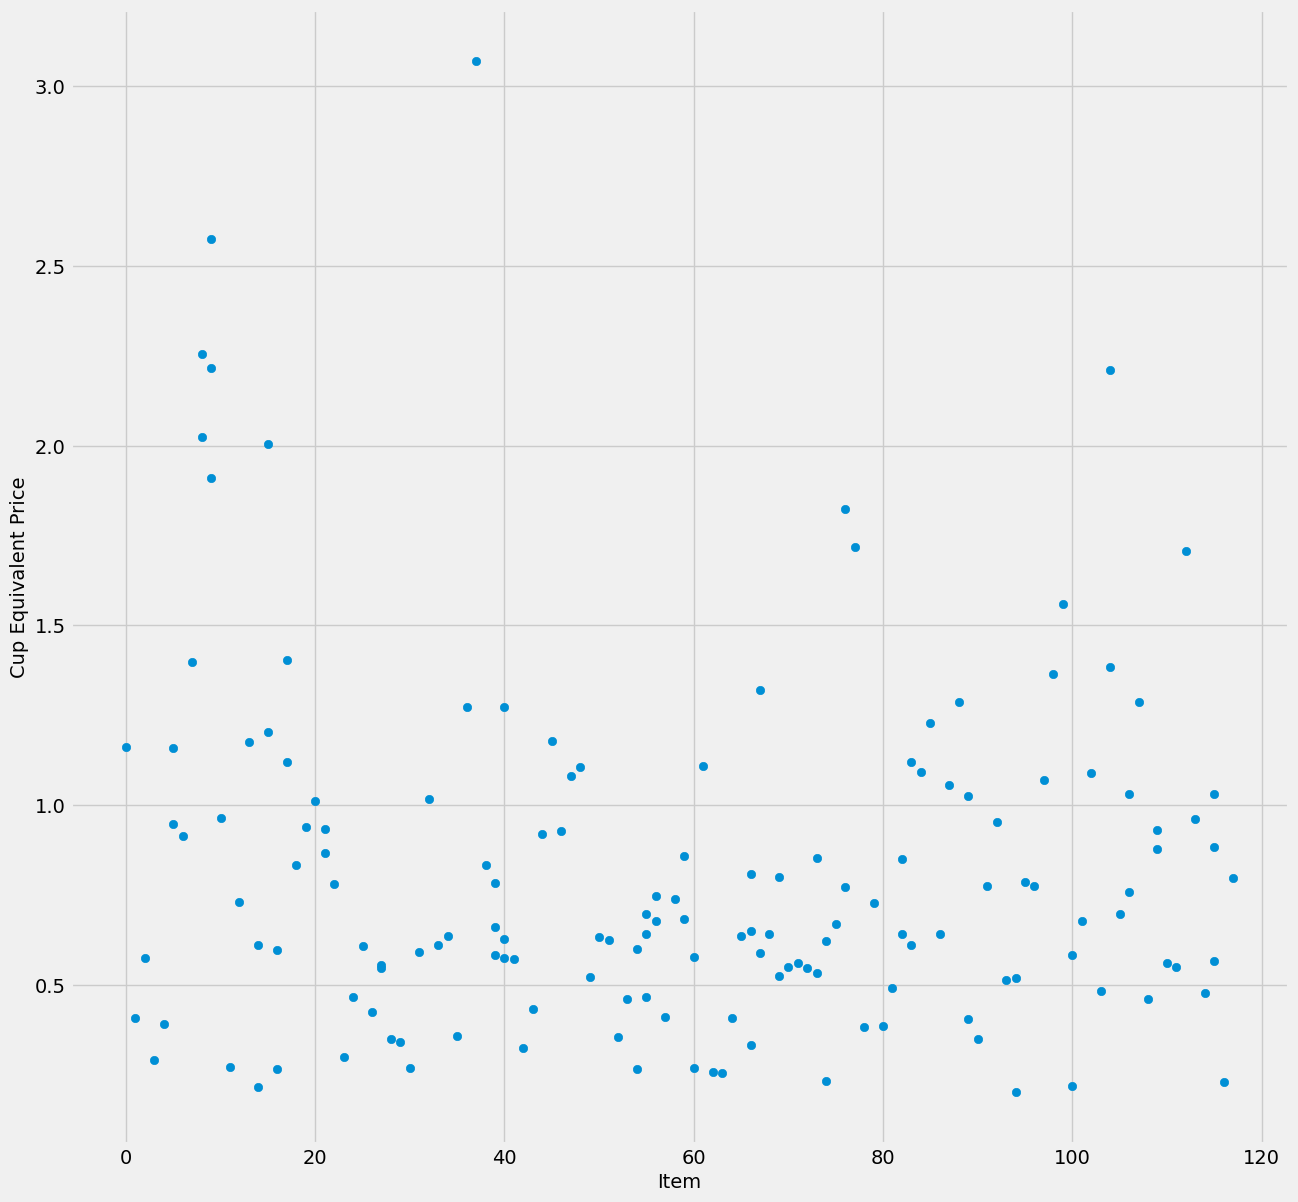

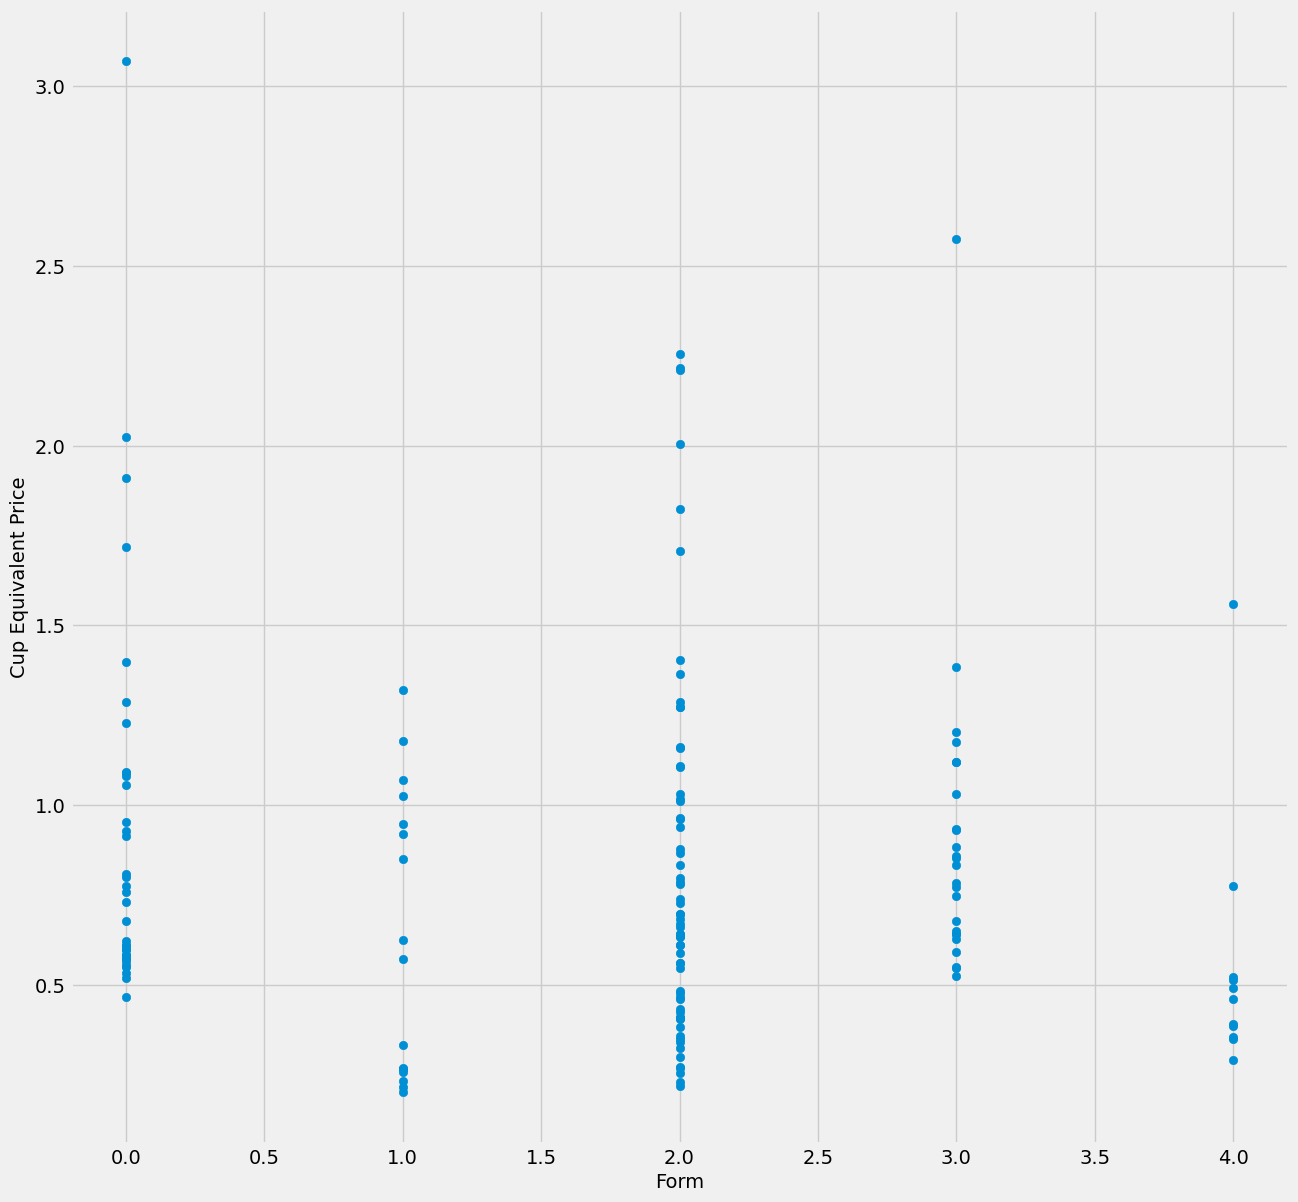

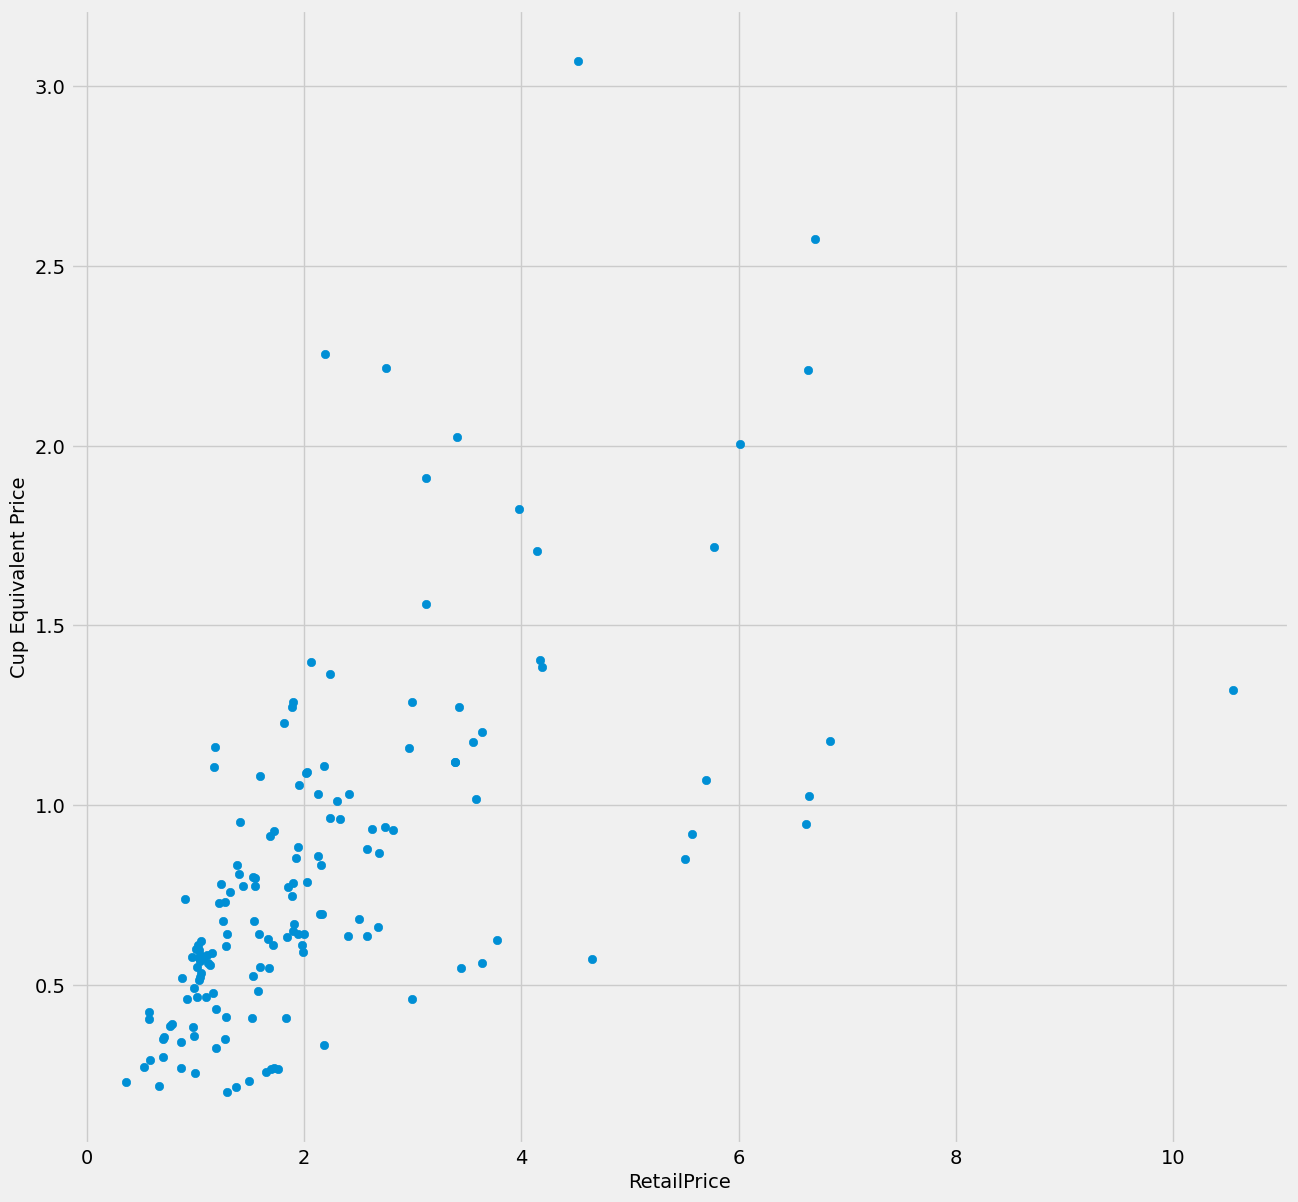

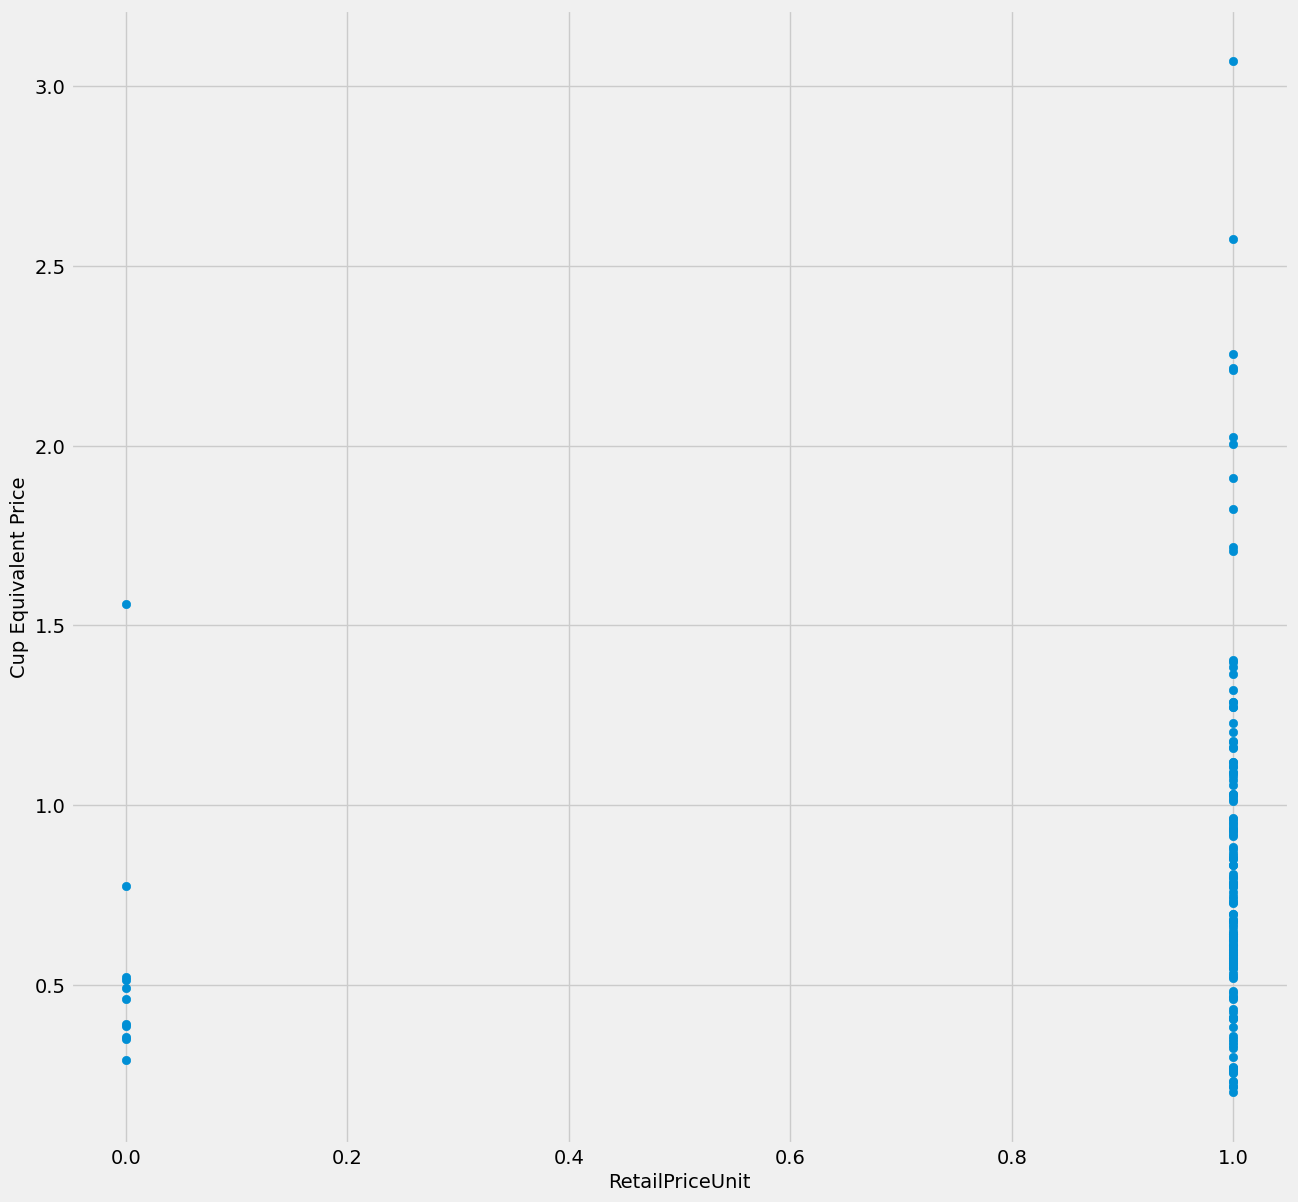

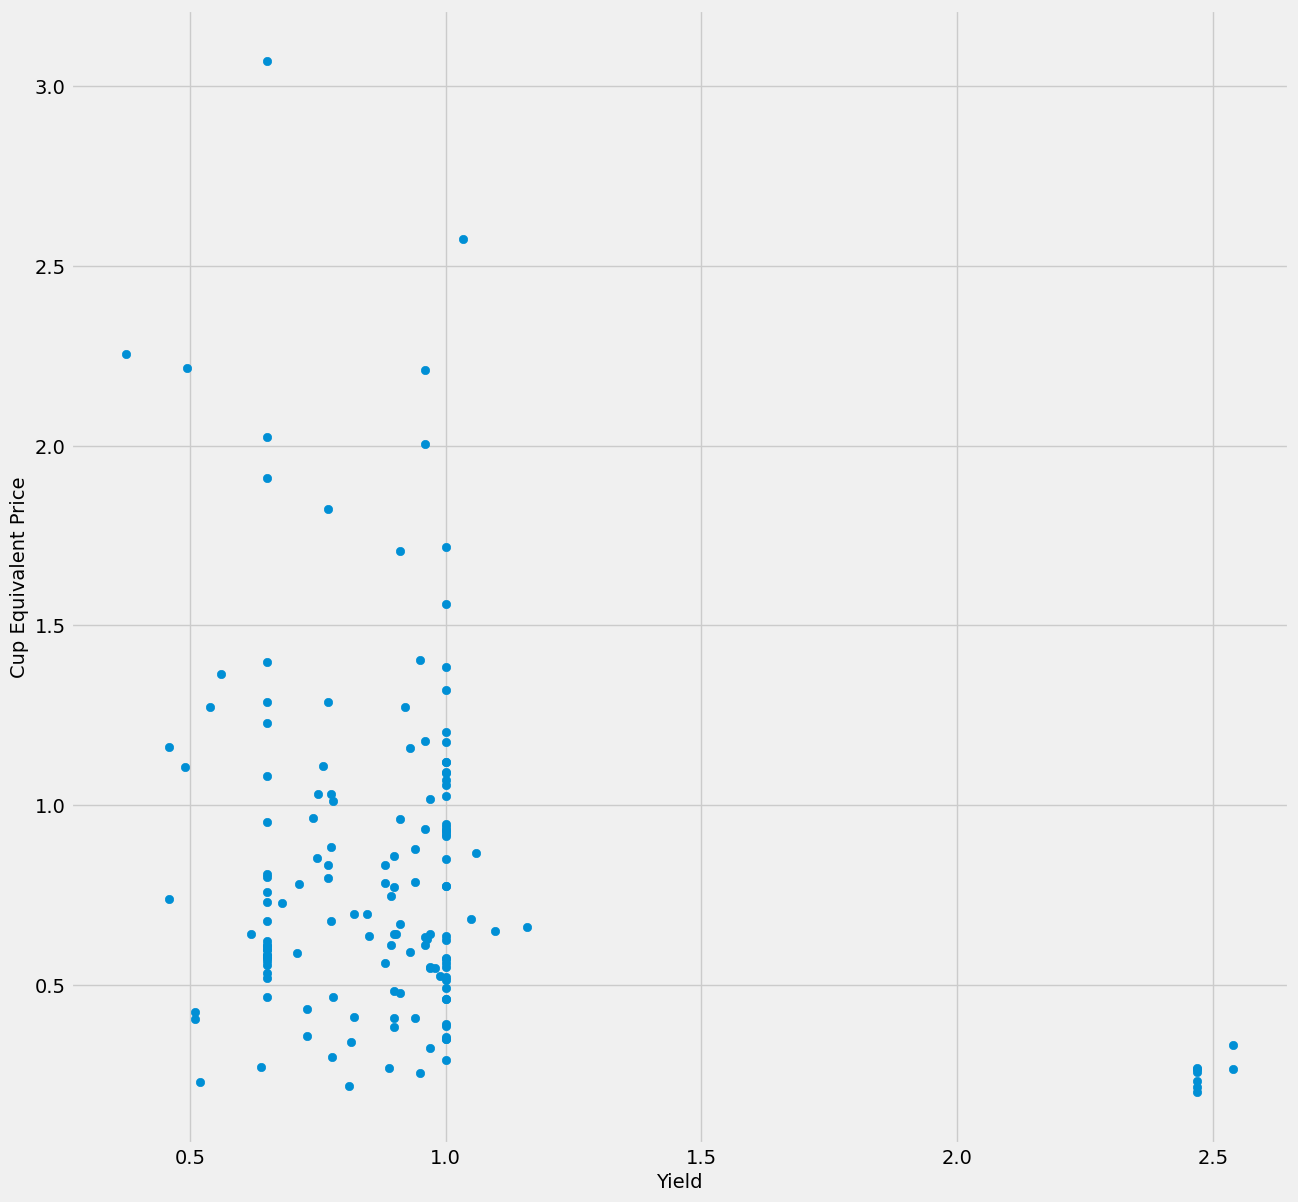

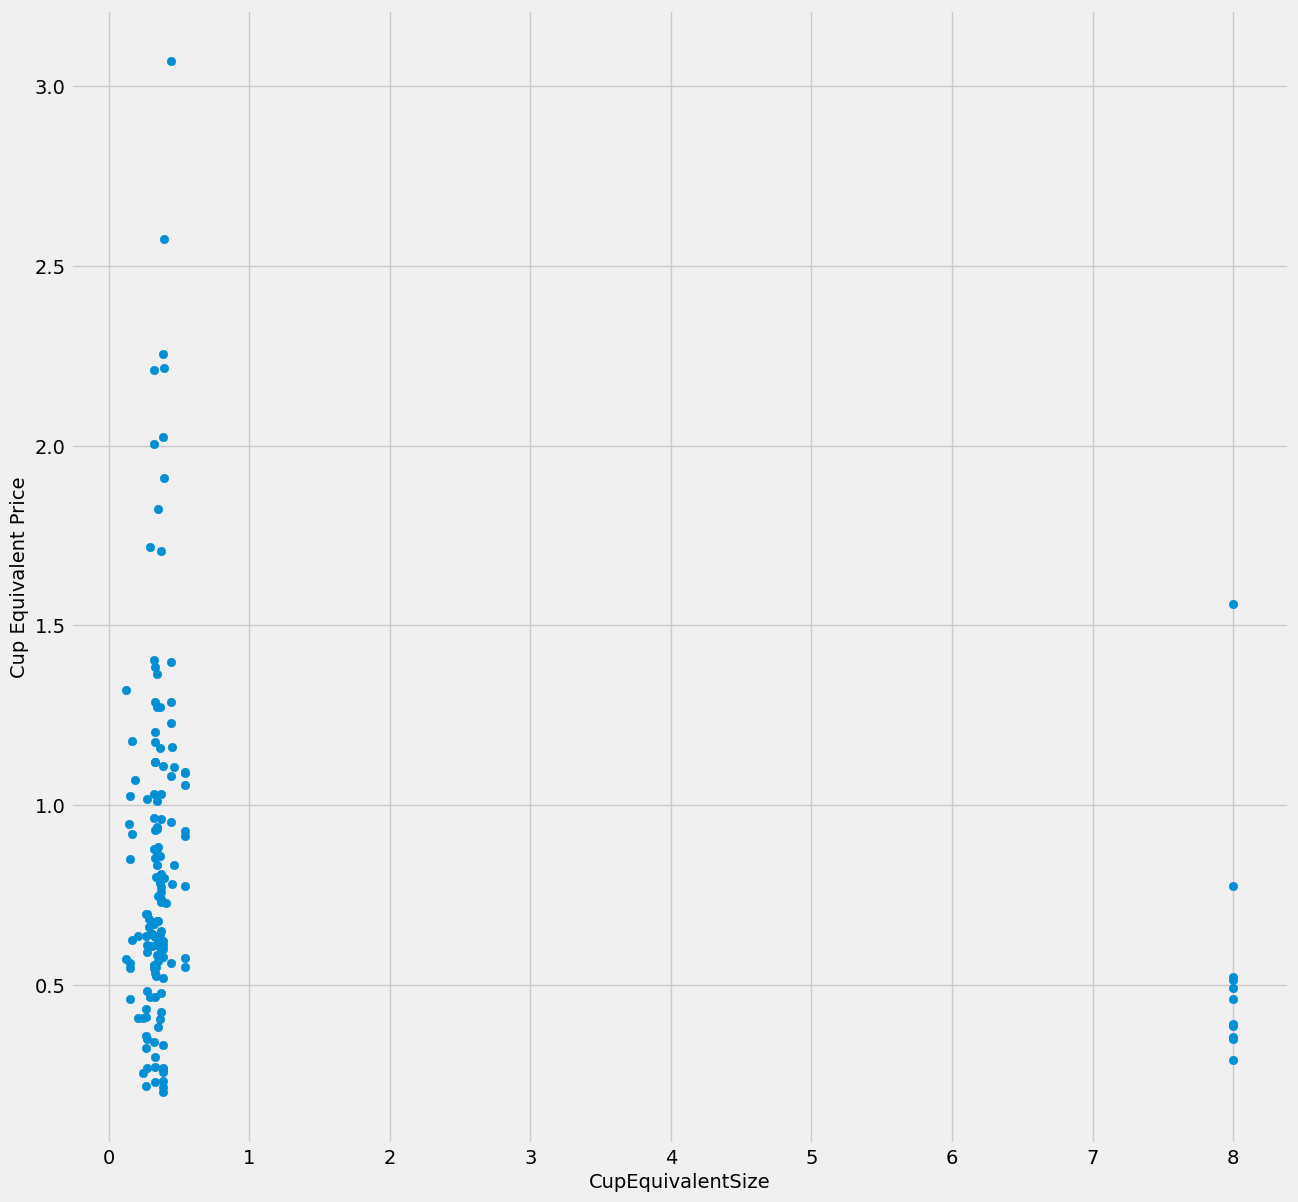

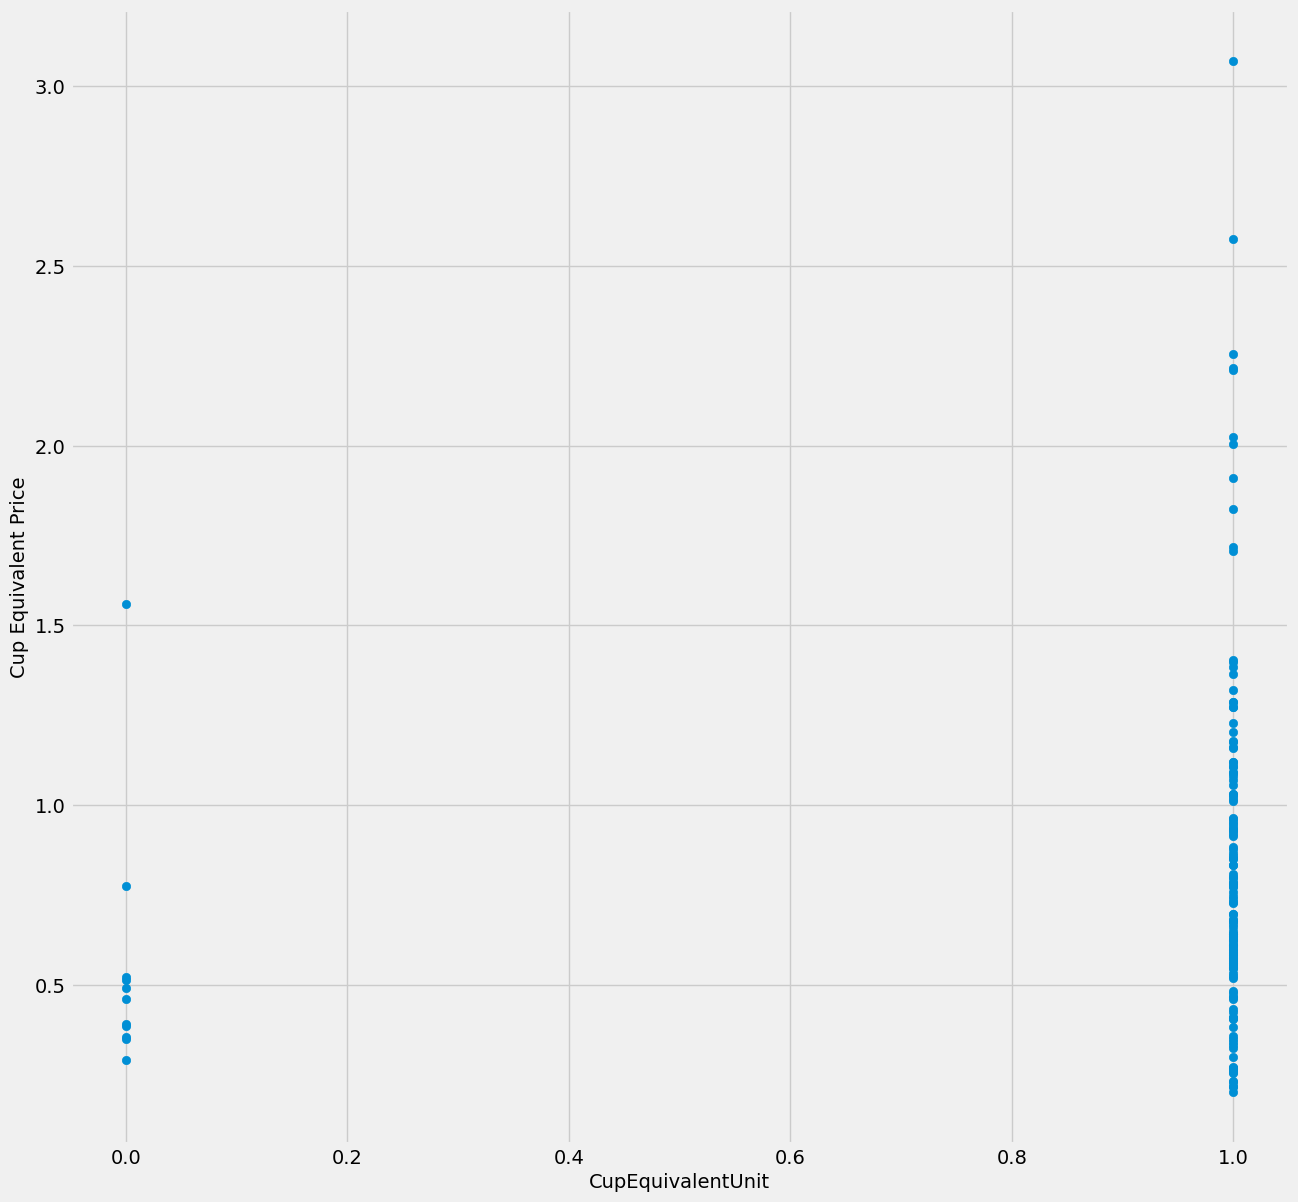

In [8]:
columns = x.columns.tolist() 
x = df.drop('CupEquivalentPrice', axis=1)
for col in columns:
    
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(14,14))
    plt.scatter(x[col], y)
    plt.xlabel(col, fontsize=14) 
    plt.ylabel('Cup Equivalent Price', fontsize=14) 
    plt.show()